<a href="https://colab.research.google.com/github/ldl23333/MAT494/blob/main/Homework_3_5_3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 3.5

In [10]:
# import libraries
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

1. K-Means

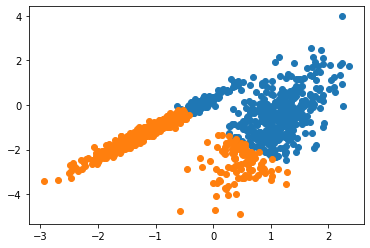

In [11]:
# Load the data
# "_" hold the position of "y" but we are not interested in y here,
# so we can use "_" instead of creating a variable y.
X, _ = make_classification(n_samples=1000, n_features=2, 
                           n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=4)

# Using the k-means method
model = KMeans(n_clusters=2)
model.fit(X)

# Assign a cluster to each example.
yhat = model.predict(X)

# Retrieve a unique cluster.
clusters = unique(yhat)

# Create a scatter plot for the samples of each cluster.
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    
# Draw the scatter plot.
plt.show()

2. Mini-Batch K-Means

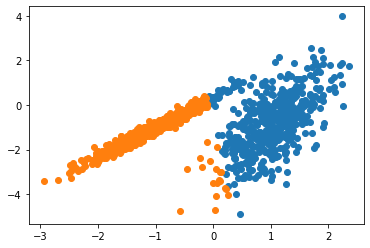

In [12]:
# Data sources
X, _ = make_classification(n_samples=1000, n_features=2, 
                           n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=4)

# Using the mini-batch k-means method
model = MiniBatchKMeans(n_clusters=2)
model.fit(X)

# Assign a cluster to each example.
yhat = model.predict(X)

# Retrieve a unique cluster.
clusters = unique(yhat)

# Create a scatter plot for the samples of each cluster.
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    
# Draw the scatter plot.
plt.show()

Homework 3.6

In [13]:
# For compatibility with Python 2
from __future__ import print_function

# To load datasets
from sklearn import datasets
from sklearn.datasets import make_blobs

# To import the classifier (SVM classifier)
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# To measure accuracy
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

# To support plots
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# To increase quality of figures
plt.rcParams["figure.figsize"] = (20, 10)

# To display all the plots inline
%matplotlib inline 

# Basics
import numpy as np
import math
import cvxopt

# To import the scalers
from sklearn.preprocessing import MinMaxScaler

class DummyScaler:
    def fit(self, data):
        pass
    def transform(self, data):
        return data

def create_scaler_minmax():
    return MinMaxScaler()

In [14]:
# be careful about the indentation in a long code block
class SVM(object):
  def fit(self, X, y):
    n_samples, n_features = X.shape

    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
      for j in range(n_samples):
        K[i,j] = np.dot(X[i], X[j])
   
    P = cvxopt.matrix(np.outer(y, y) * K)  # P = X^T X 
    q = cvxopt.matrix(np.ones(n_samples) * -1) # q = -1 (1xN)
    A = cvxopt.matrix(y, (1, n_samples)) # A = y^T
    b = cvxopt.matrix(0.0) # b = 0 
    G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1)) # -1 (NxN)
    h = cvxopt.matrix(np.zeros(n_samples)) # 0 (1xN)
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)

    a = np.ravel(solution['x']) # Lagrange multipliers
    # Lagrange have non zero lagrange multipliers
    sv = a > 1e-5
    ind = np.arange(len(a))[sv]
    self.a = a[sv]
    self.sv = X[sv]
    self.sv_y = y[sv]
    self.b = 0  # Intercept
    for n in range(len(self.a)):
      self.b += self.sv_y[n]
      self.b -= np.sum(self.a * self.sv_y * K[ind[n], sv])
      self.b /= len(self.a)

    # Weights
    self.w = np.zeros(n_features)
    for n in range(len(self.a)):
      self.w += self.a[n] * self.sv_y[n] * self.sv[n]

  def project(self, X):
    return np.dot(X, self.w) + self.b

  def predict(self, X):
    return np.sign(self.project(X))

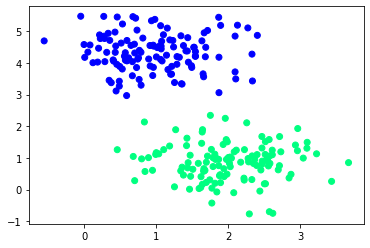

In [15]:
X, y = make_blobs(n_samples = 250, centers = 2,
                  random_state = 0, cluster_std = 0.60)
y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y

# plot the data we just generated
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'winter')

In [16]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# initiate a new object of the SVM class we just created, so it can use all the functions we made inside that SVM class
# svm is a model
svm = SVM()

# fit the training data to the model
svm.fit(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -1.8226e+01 -3.4458e+01  6e+02  2e+01  2e+00
 1: -2.5252e+01 -1.8773e+01  2e+02  9e+00  7e-01
 2: -5.3459e+01 -3.2711e+01  2e+02  7e+00  6e-01
 3: -7.8360e+01 -2.6482e+01  1e+02  4e+00  3e-01
 4: -5.6818e+00 -5.1750e+00  1e+01  2e-01  1e-02
 5: -3.6906e+00 -4.1082e+00  4e-01  2e-15  9e-15
 6: -4.0061e+00 -4.0104e+00  4e-03  2e-17  5e-15
 7: -4.0094e+00 -4.0094e+00  4e-05  9e-16  5e-15
 8: -4.0094e+00 -4.0094e+00  4e-07  1e-15  6e-15
Optimal solution found.


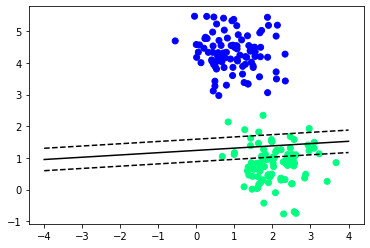

In [17]:
def f(x, w, b, c=0):
    return (-w[0] * x - b + c) / w[1]
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')

# w.x + b = 0
a0 = -4; a1 = f(a0, svm.w, svm.b)
b0 = 4; b1 = f(b0, svm.w, svm.b)
plt.plot([a0,b0], [a1,b1], 'k')

# w.x + b = 1
a0 = -4; a1 = f(a0, svm.w, svm.b, 1)
b0 = 4; b1 = f(b0, svm.w, svm.b, 1)
plt.plot([a0,b0], [a1,b1], 'k--')

# w.x + b = -1
a0 = -4; a1 = f(a0, svm.w, svm.b, -1)
b0 = 4; b1 = f(b0, svm.w, svm.b, -1)
plt.plot([a0,b0], [a1,b1], 'k--')


In [18]:
y_pred = svm.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[29,  0],
       [ 7, 27]])

In [19]:
# LinearSVC is an existing class from sklearn, now we can just use it as well as all the functions within
svc = LinearSVC() 

# fit the training data to the model
svc.fit(X_train, y_train)

LinearSVC()

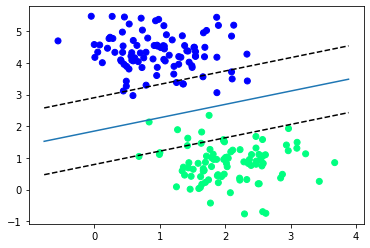

In [20]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter');
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')

In [21]:
y_pred = svc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[29,  0],
       [ 0, 34]])